## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

## GET DATA

In [2]:
items = pd.read_csv("brazilian-ecommerce-data/olist_order_items_dataset.csv")
products = pd.read_csv("brazilian-ecommerce-data/olist_products_dataset.csv")
translate = pd.read_csv("brazilian-ecommerce-data/product_category_name_translation.csv")
sellers = pd.read_csv("brazilian-ecommerce-data/olist_sellers_dataset.csv")
orders = pd.read_csv("brazilian-ecommerce-data/olist_orders_dataset.csv")
reviews = pd.read_csv("brazilian-ecommerce-data/olist_order_reviews_dataset.csv")
payments = pd.read_csv("brazilian-ecommerce-data/olist_order_payments_dataset.csv")
geos = pd.read_csv("brazilian-ecommerce-data/olist_geolocation_dataset.csv")
customers = pd.read_csv("brazilian-ecommerce-data/olist_customers_dataset.csv")

In [3]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## TOP 10 HIGH PRICE PRODUCT CATEGORIES

In [5]:
ds = items.merge(products, how = 'left', on = 'product_id').merge(translate, how = 'left', on = 'product_category_name')
highprice_avg = ds.groupby('product_category_name_english').mean()['price'].sort_values(ascending = False)
highprice_avg #.sort_values(ascending = False).head(10)

highprice_avg.to_csv('data-cuts/highprice_avg.csv')

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [6]:
highprice_prod = ds.sort_values('price', ascending = False)[['product_category_name_english', 'price', 'product_id']]
highprice_prod.head()

highprice_prod.to_csv('data-cuts/highprice_prod.csv')

In [7]:
highprice_prod

,product_category_name_english,price,product_id
3556,housewares,6735.00,489ae2aa008f021502940f251d4cce7f
112233,computers,6729.00,69c590f7ffc7bf8db97190b6cb6ed62e
107841,art,6499.00,1bdf5e6731585cf01aa8169c7028d6ad
74336,small_appliances,4799.00,a6492cc69376c469ab6f61d8f44de961
11249,small_appliances,4690.00,c3ed642d592594bb648ff4a04cee2747
62086,computers,4590.00,259037a6a41845e455183f89c5035f18
29193,musical_instruments,4399.87,a1beef8f3992dbd4cd8726796aa69c53
45843,consoles_games,4099.99,6cdf8fc1d741c76586d8b6b15e9eef30
78310,sports_leisure,4059.00,dd113cb02b2af9c8e5787e8f1f0722f6
59137,watches_gifts,3999.90,6902c1962dd19d540807d0ab8fade5c6


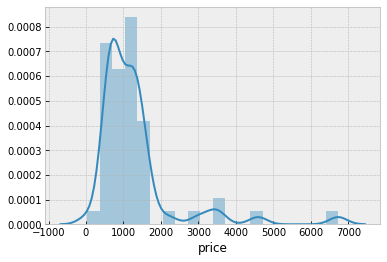

In [8]:
comps = highprice_prod[highprice_prod['product_category_name_english'] == 'computers'].drop_duplicates()
comps.to_csv('data-cuts/comps.csv')

sns.distplot(comps['price'], bins = 20)

## TOP ORDERS

What products are being sold the most?
- Health and beauty is already somewhat saturated - a lot of products being sold.
- Build the two computer accessories to provide alternative for 

In [9]:
toporders = ds.groupby(['product_id', 'product_category_name_english', 'price','product_length_cm','product_height_cm','product_width_cm']).count()['order_id'].sort_values(ascending = False)
toporders = toporders.reset_index()
toporders['rev'] = toporders['price'] * toporders['order_id']
toporders['size'] = toporders['product_height_cm'] * toporders['product_width_cm'] * toporders['product_length_cm']
toporders['totsize'] = toporders['size'] * toporders['order_id']
toporders.sort_values('rev', ascending = False).head(15)

toporders.to_csv('data-cuts/toporders.csv')

In [9]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## WHERE IS IT SELLNG?

In [10]:
ds2 = items.merge(orders, on = 'order_id').merge(sellers, on = 'seller_id').merge(customers, on = 'customer_id').merge(products, on = 'product_id').merge(translate, on = 'product_category_name')
ds2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,GO,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,PR,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [21]:
buyers = ds2[['order_id', 'customer_id', 'customer_city', 'customer_state', 'product_category_name_english', 'product_id']]
buyers = buyers[buyers['product_category_name_english'] == 'computers']
buyers.groupby('customer_city').count()['product_id'].sort_values(ascending = False).head()

buyers.to_csv('data-cuts/buyers.csv')

In [22]:
buyers_parts = ds2[['order_id', 'customer_id', 'customer_city', 'customer_state', 'product_category_name_english', 'product_id']]
buyers_parts = buyers_parts[buyers_parts['product_category_name_english'] == 'computers_accessories']
buyers_parts.groupby('customer_city').count()['product_id'].sort_values(ascending = False).head()

buyers_parts.to_csv('data-cuts/buyers_parts.csv')

In [23]:
sellers = ds2[['order_id', 'seller_id', 'seller_city', 'seller_state', 'product_category_name_english', 'product_id']]
sellers = sellers[sellers['product_category_name_english'] == 'computers']
sellers.groupby('seller_city').count()['product_id'].sort_values(ascending = False)

sellers.to_csv('data-cuts/sellers.csv')

In [24]:
sellers_parts = ds2[['order_id', 'seller_id', 'seller_city', 'seller_state', 'product_category_name_english', 'product_id']]
sellers_parts = sellers_parts[sellers_parts['product_category_name_english'] == 'computers_accessories']
sellers_parts.groupby('seller_city').count()['product_id'].sort_values(ascending = False)

sellers_parts.to_csv('data-cuts/sellers_parts.csv')